Clear memory :

In [ ]:
%reset -f

# Data Wrangling:

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


###Import All Libraries:

In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from pprint import pprint

###Import Dataset:

The Dataset (Kaggle link is [here to download](https://www.kaggle.com/datasets/inigolopezrioboo/a-tripadvisor-dataset-for-nlp-tasks)) consist Restaurant Reviews of Six Cities in the World (Barcelona, London, Paris, Madrid, New York and New Delhi).

We will consider the dataset from London for our analysis.



In [ ]:
london = pd.read_csv('gdrive/My Drive/Colab Notebooks/TripAdvisor Review NLP Analysis/data/London_reviews.csv')
london.head()

,Unnamed: 0,parse_count,restaurant_name,rating_review,sample,review_id,title_review,review_preview,review_full,date,city,url_restaurant,author_id
0,0,1,Cocotte_Notting_Hill,5.0,Positive,review_771556136,JUST PERFECT,I was away for couple of months and I am so h...,I was away for couple of months and I am so ha...,"September 23, 2020",London_England,https://www.tripadvisor.com/Restaurant_Review-...,UID_0
1,1,2,Cocotte_Notting_Hill,5.0,Positive,review_771555883,"Quality food, Food travels well, Excellent cus...",I recently ordered over the phone from Cocotte...,I recently ordered over the phone from Cocotte...,"September 23, 2020",London_England,https://www.tripadvisor.com/Restaurant_Review-...,UID_1
2,2,3,Cocotte_Notting_Hill,5.0,Positive,review_770716943,Came here because we missed,Came here because we missed our table at Farma...,Came here because we missed our table at Farma...,"September 17, 2020",London_England,https://www.tripadvisor.com/Restaurant_Review-...,UID_2
3,3,4,Cocotte_Notting_Hill,5.0,Positive,review_770027676,Great service,My first time in cocotte and was amazed by how...,My first time in cocotte and was amazed by how...,"September 12, 2020",London_England,https://www.tripadvisor.com/Restaurant_Review-...,UID_3
4,4,5,Cocotte_Notting_Hill,5.0,Positive,review_766307138,𝓔𝔁𝓬𝓮𝓵𝓵𝓮𝓷𝓽 𝓕𝓪𝓻𝓶-𝓽𝓸-𝓣𝓪𝓫𝓵𝓮 𝓡𝓸𝓽𝓲𝓼𝓼𝓮𝓻𝓲𝓮,A healthy-homemade dishes using farm-grown ing...,A healthy-homemade dishes using farm-grown ing...,"August 22, 2020",London_England,https://www.tripadvisor.com/Restaurant_Review-...,UID_4


###Modify Data for Text Analysis (Data Preprocessing):

In [ ]:
## Delete Unnecessary Columns:
london.drop(columns=["Unnamed: 0","parse_count","review_id","url_restaurant","author_id","date","title_review","review_preview","city"],inplace=True)

In [ ]:
## Delete all Null rows:
london= london.dropna(how='any',axis=0)

In [ ]:
## Change Variable(Column Type):
london['rating_review'] = london['rating_review'].astype('float')
london['rating_review'] = london['rating_review'].astype('int64')

In [ ]:
london.head()

,restaurant_name,rating_review,sample,review_full
0,Cocotte_Notting_Hill,5,Positive,I was away for couple of months and I am so ha...
1,Cocotte_Notting_Hill,5,Positive,I recently ordered over the phone from Cocotte...
2,Cocotte_Notting_Hill,5,Positive,Came here because we missed our table at Farma...
3,Cocotte_Notting_Hill,5,Positive,My first time in cocotte and was amazed by how...
4,Cocotte_Notting_Hill,5,Positive,A healthy-homemade dishes using farm-grown ing...


In [ ]:
london.info()

<class 'pandas.core.frame.DataFrame'>
Index: 996546 entries, 0 to 996566
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   restaurant_name  996546 non-null  object
 1   rating_review    996546 non-null  int64 
 2   sample           996546 non-null  object
 3   review_full      996546 non-null  object
dtypes: int64(1), object(3)
memory usage: 38.0+ MB


For basic preprocessing purpose, we will use the NLTK library to preprocess our text data:

In [ ]:
import nltk

nltk.download(['stopwords','averaged_perceptron_tagger','wordnet'])

from collections import defaultdict
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from nltk.tokenize import regexp_tokenize, word_tokenize, RegexpTokenizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


###Set Stopwords:

In [ ]:
stop = set(stopwords.words('english'))

POS Tagging:

In [ ]:
def get_wordnet_pos(treebank_tag):
    '''
    Translate nltk POS to wordnet tags
    '''
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

###Preprocessing:

In [ ]:
def preprocess(doc, stop_words= stop):
    regex_token = RegexpTokenizer(r'\w+')
    doc = regex_token.tokenize(doc)
    doc = [word.lower() for word in doc]
    doc = [word for word in doc if word not in stop]
    doc = pos_tag(doc)
    doc = [(word[0], get_wordnet_pos(word[1])) for word in doc]
    lemmatizer = WordNetLemmatizer()
    doc = [lemmatizer.lemmatize(word[0], word[1]) for word in doc]
    return ' '.join(doc)

In [ ]:
london['text'] = london['review_full'].map(lambda s: preprocess(s))

###Tokenizing:

In [15]:
london['tokenized'] = [x.split() for x in london['text']]

In [16]:
london.head()

,restaurant_name,rating_review,sample,review_full,text,tokenized
0,Cocotte_Notting_Hill,5,Positive,I was away for couple of months and I am so ha...,away couple month happy back regular cocotte m...,"[away, couple, month, happy, back, regular, co..."
1,Cocotte_Notting_Hill,5,Positive,I recently ordered over the phone from Cocotte...,recently order phone cocotte collect gather ho...,"[recently, order, phone, cocotte, collect, gat..."
2,Cocotte_Notting_Hill,5,Positive,Came here because we missed our table at Farma...,come miss table farmacy across road waitress a...,"[come, miss, table, farmacy, across, road, wai..."
3,Cocotte_Notting_Hill,5,Positive,My first time in cocotte and was amazed by how...,first time cocotte amaze friendly member front...,"[first, time, cocotte, amaze, friendly, member..."
4,Cocotte_Notting_Hill,5,Positive,A healthy-homemade dishes using farm-grown ing...,healthy homemade dish use farm grown ingredien...,"[healthy, homemade, dish, use, farm, grown, in..."


In [17]:
london['Word_count']= london['review_full'].map(lambda x: len(x.split()))

In [18]:
london.head()

,restaurant_name,rating_review,sample,review_full,text,tokenized,Word_count
0,Cocotte_Notting_Hill,5,Positive,I was away for couple of months and I am so ha...,away couple month happy back regular cocotte m...,"[away, couple, month, happy, back, regular, co...",50
1,Cocotte_Notting_Hill,5,Positive,I recently ordered over the phone from Cocotte...,recently order phone cocotte collect gather ho...,"[recently, order, phone, cocotte, collect, gat...",106
2,Cocotte_Notting_Hill,5,Positive,Came here because we missed our table at Farma...,come miss table farmacy across road waitress a...,"[come, miss, table, farmacy, across, road, wai...",64
3,Cocotte_Notting_Hill,5,Positive,My first time in cocotte and was amazed by how...,first time cocotte amaze friendly member front...,"[first, time, cocotte, amaze, friendly, member...",47
4,Cocotte_Notting_Hill,5,Positive,A healthy-homemade dishes using farm-grown ing...,healthy homemade dish use farm grown ingredien...,"[healthy, homemade, dish, use, farm, grown, in...",132


Save the Preprocessed Tokenized Dataset for further use:

In [20]:
london.to_csv('gdrive/My Drive/Colab Notebooks/TripAdvisor Review NLP Analysis/London/london.csv', index=False)

# Exploratory Data Analysis on Dataset:

###Analysis on 'Sample'( review Positive or Negative) Variable:


Text(0, 0.5, 'Total Count on Reviews')

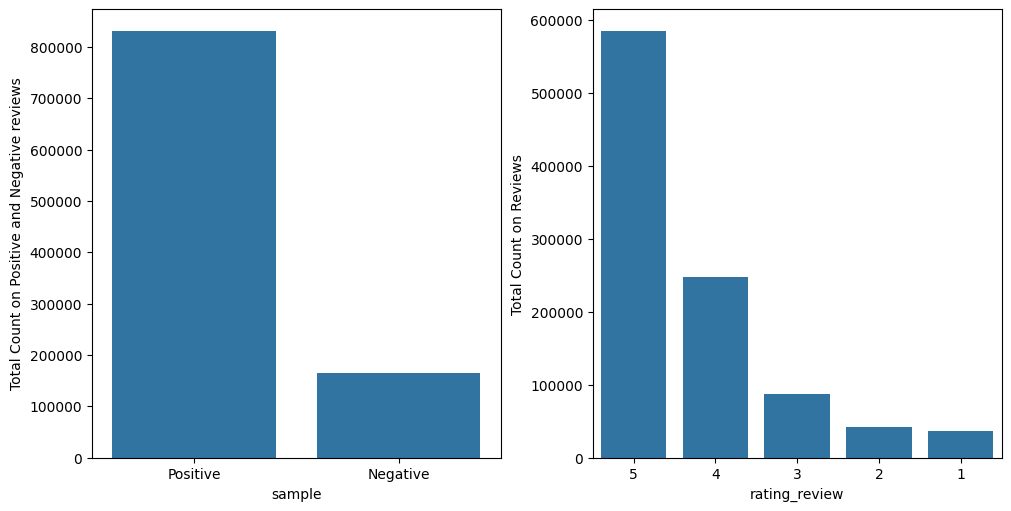

In [21]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5),layout="constrained")

#Create a Barplot:
sns.countplot( x= 'sample', data= london, order=london['sample'].value_counts().index, ax=ax1)
ax1.set_ylabel("Total Count on Positive and Negative reviews")

sns.countplot( x= 'rating_review', data= london, order=london['rating_review'].value_counts().index, ax=ax2)
ax2.set_ylabel("Total Count on Reviews")

Comment:

From the graphs, we see that the Positive Reviews are majority, i.e. people left positive reviews most about the restaurants.

For further analysis, we have to keep in mind that this is a Imbalanced Class Classification for Sentiment Analysis.

### Analysis on 'Restaurant Name' Variable:

In [22]:
london['restaurant_name'].nunique()

1827

Comment: There are 1827 different restaurant names in London covered in this dataset.

### Analysis on Restaurant Reviews:

Frequency Distrubution of Top Tokenized Words:

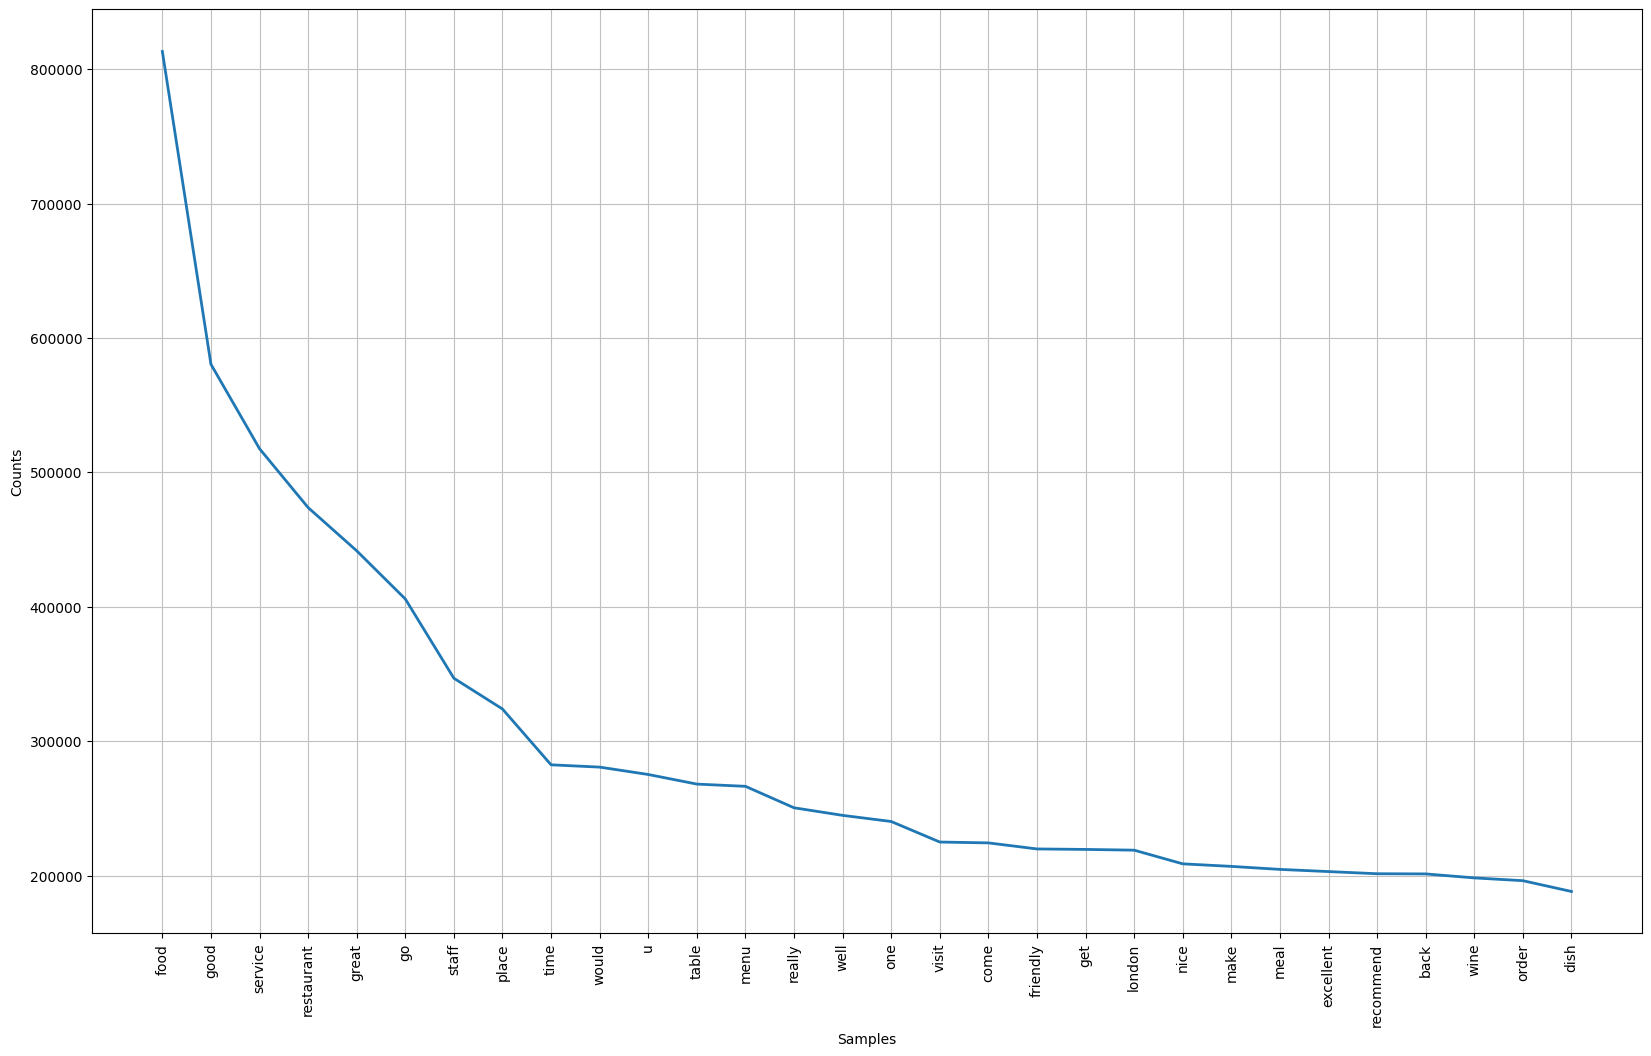

<Axes: xlabel='Samples', ylabel='Counts'>

In [23]:
from nltk.probability import FreqDist

tokenized_words = london['tokenized'].to_list()

word_list = []
for x in tokenized_words:
    word_list.extend(x)
word_list

freq_dist_text = FreqDist(word_list)
plt.subplots(figsize=(20,12))
freq_dist_text.plot(30)

Top 20 most Common words:

In [24]:
from nltk.probability import FreqDist

freq_dist_text.most_common(20)

[('food', 813118),
 ('good', 580409),
 ('service', 517614),
 ('restaurant', 473817),
 ('great', 441661),
 ('go', 405834),
 ('staff', 346852),
 ('place', 323971),
 ('time', 282454),
 ('would', 280748),
 ('u', 275257),
 ('table', 268112),
 ('menu', 266457),
 ('really', 250493),
 ('well', 244853),
 ('one', 240296),
 ('visit', 225009),
 ('come', 224373),
 ('friendly', 219873),
 ('get', 219513)]

The above list are the most frequent words in the text.

Wordclouds w.r.to Positive and Negative reviews:

In [26]:
from wordcloud import WordCloud, STOPWORDS

stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=50,
        max_font_size=40,
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title:
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

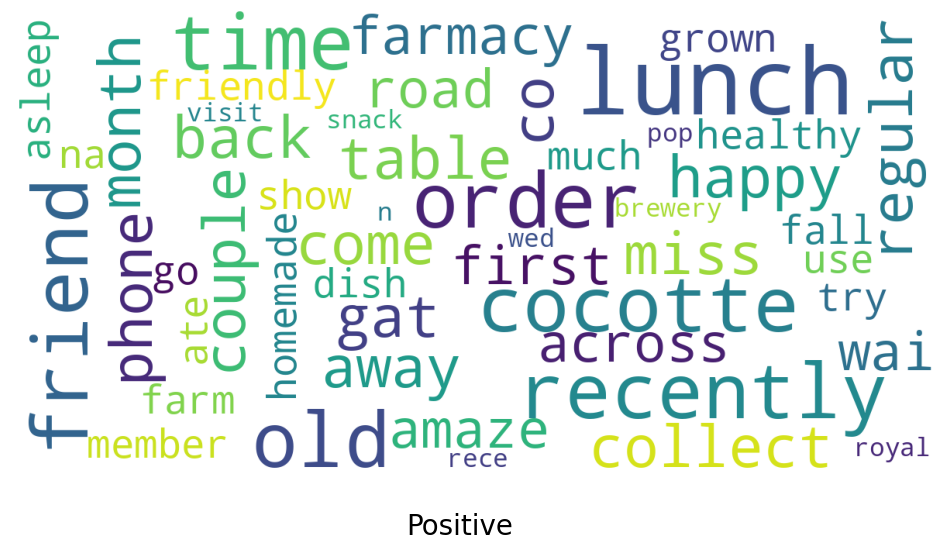

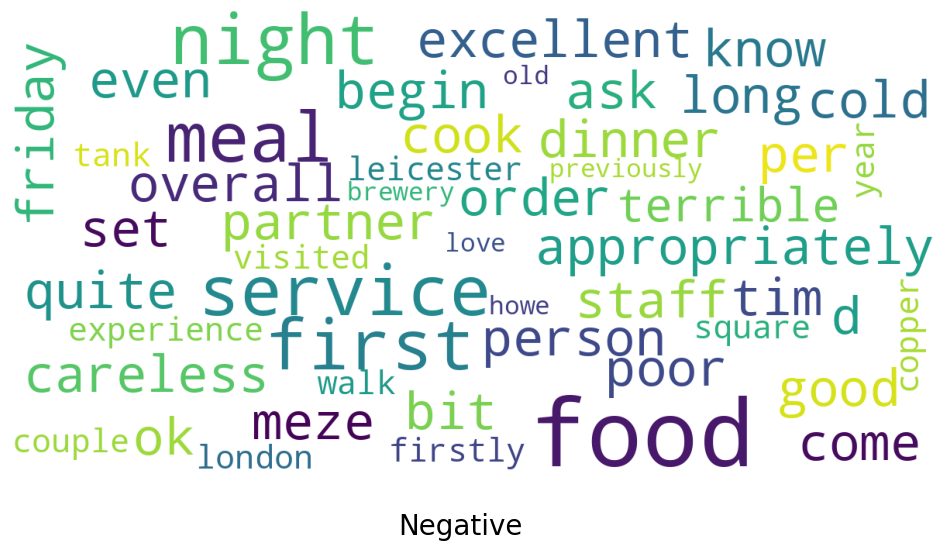

In [27]:
for rating in list(london['sample'].unique()):
    show_wordcloud(london[london['sample']==rating]['tokenized'], title=rating)

Wordcount by reviews:

<Axes: xlabel='rating_review', ylabel='Word_count'>

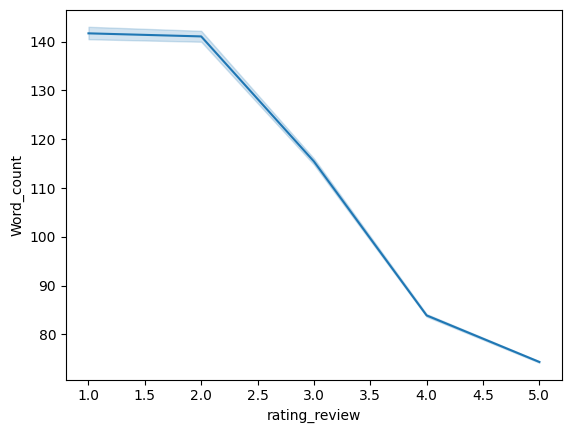

In [28]:
sns.lineplot(x='rating_review', data=london, y='Word_count')

Observation:

Reviewers with 5 star ratings tend to use less words in their reveiws/ comments, where as people with 1 and 2 star rating tend to use more words to post their reviews.


So, in general we can infer that most people are happy with the service and they post positive reviews. People who are not happy with the services, they post long reviews; but they are less in numbers compared to the number of happy customers.



---



---

